# **This file performs below operations** -

***s1: EVI and LSWI Modeling - timeframe (2000-2022)***
```
1. Model target variable ER by taking each of the sensor measurements GPP,
   NEE,ET at a time.
2. Use PCA+Modeling approach to solve this problem.
3. For PCA, we select the components that carry 95% variance in the data
4. For modeling these below 4 models are selected:
   (a) Linear Regression
   (b) SVM Regression
   (c) Random Forest Regressor
   (d) XGBoost Regressor
6. Extracted top 5 features from the best models for the target variable
   ER.
```

```





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from os import walk
from time import sleep
from tqdm import tqdm
import pickle
import string
import numpy as np
import pandas as pd
from scipy import stats
from scipy import interpolate
import plotly.express as px
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
gopi_base_path = '/content/drive/MyDrive/Colab Notebooks/DISC OU/DS for Ag - Alfalfa/Fall 2023'
Adam_base_path = '/content/drive/MyDrive/DSA Project'
raj_path = '/content/drive/MyDrive/DS for Ag - Alfalfa/Fall 2023'
base_path = raj_path # just change this line
s1_data_path = os.path.join(base_path, 'Data','EVI and LSWI')
s2_data_path = os.path.join(base_path, 'Data','ER')

In [ ]:
main_path = '/content/drive/MyDrive/DS for Ag - Alfalfa/Fall 2023'
data_path = os.path.join(main_path, 'Data')
code_path = os.path.join(main_path, 'Code')

In [ ]:
pickle_dir = os.path.join(data_path, 'pickle files')
# save the combined alfalfa data to a pickle file
pickle_dir = os.path.join(data_path, 'pickle files')
if os.path.exists(pickle_dir) == False:
  os.mkdir(pickle_dir)

In [ ]:
# Reading pickle file.
pickle_dir = os.path.join(data_path, 'pickle files')
file_name = 'df_filtered.pkl'
file_path = os.path.join(pickle_dir, file_name)
with open(file_path, 'rb') as fp:
    df_filtered = pickle.load(fp)

print(df_filtered.head())

             TMAX   TMIN   TAVG   HAVG  VDEF   HDEG  CDEG   WSPD   ATOT  RAIN  \
Date                                                                            
2000-03-16  51.91  30.63  35.60  99.84  0.01  23.73   0.0  12.53   1.95  0.23   
2000-03-17  44.02  31.91  38.90  99.32  0.06  27.03   0.0   4.99   3.44  0.40   
2000-03-18  47.59  39.43  42.18  91.32  0.85  21.49   0.0   8.90   5.66  0.02   
2000-03-19  60.55  37.21  46.12  67.95  4.29  16.12   0.0  11.10  23.28  0.00   
2000-03-20  73.85  37.63  55.00  57.60  8.43   9.26   0.0  15.37  23.64  0.00   

            ...   BAVG    TR05    TR25    TR60     EVI    LSWI  RAIN_7_Days  \
Date        ...                                                               
2000-03-16  ...  49.05  1.5728  1.5437  1.4708  0.1671 -0.2239         0.54   
2000-03-17  ...  43.58  1.5291  1.5439  1.4723  0.1700 -0.2250         0.93   
2000-03-18  ...  46.06  1.5287  1.5465  1.4685  0.1741 -0.2236         0.95   
2000-03-19  ...  48.53  1.5285  1.543

In [ ]:
df_filtered

,TMAX,TMIN,TAVG,HAVG,VDEF,HDEG,CDEG,WSPD,ATOT,RAIN,...,BAVG,TR05,TR25,TR60,EVI,LSWI,RAIN_7_Days,RAIN_14_Days,RAIN_21_Days,RAIN_28_Days
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-16,51.91,30.63,35.60,99.84,0.01,23.73,0.0,12.53,1.95,0.23,...,49.05,1.5728,1.5437,1.4708,0.1671,-0.2239,0.54,1.31,2.60,3.08
2000-03-17,44.02,31.91,38.90,99.32,0.06,27.03,0.0,4.99,3.44,0.40,...,43.58,1.5291,1.5439,1.4723,0.1700,-0.2250,0.93,1.64,2.42,3.48
2000-03-18,47.59,39.43,42.18,91.32,0.85,21.49,0.0,8.90,5.66,0.02,...,46.06,1.5287,1.5465,1.4685,0.1741,-0.2236,0.95,1.66,2.44,3.50
2000-03-19,60.55,37.21,46.12,67.95,4.29,16.12,0.0,11.10,23.28,0.00,...,48.53,1.5285,1.5431,1.4681,0.1782,-0.2200,0.95,1.66,2.44,3.50
2000-03-20,73.85,37.63,55.00,57.60,8.43,9.26,0.0,15.37,23.64,0.00,...,50.28,1.5416,1.5443,1.4706,0.1825,-0.2141,0.95,1.66,2.44,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,62.96,35.38,48.06,75.90,3.46,15.83,0.0,11.00,9.35,0.01,...,47.67,2.3404,1.9822,2.5208,0.2145,-0.0925,0.01,0.02,0.02,0.02
2021-12-24,78.84,50.56,65.62,38.61,14.70,0.30,0.0,18.00,7.44,0.00,...,51.71,2.3299,1.9822,2.5161,0.2287,-0.0706,0.01,0.01,0.02,0.02
2021-12-25,71.31,45.97,58.67,48.67,9.56,6.36,0.0,7.34,9.60,0.00,...,55.04,2.3254,1.9832,2.5116,0.2484,-0.0417,0.01,0.01,0.02,0.02



 **Feature Selection method + PCA + Modelling**

In [ ]:
p13_EVI = df_filtered.copy()
p13_LSWI = df_filtered.copy()

In [ ]:
p13_LSWI

,TMAX,TMIN,TAVG,HAVG,VDEF,HDEG,CDEG,WSPD,ATOT,RAIN,...,BAVG,TR05,TR25,TR60,EVI,LSWI,RAIN_7_Days,RAIN_14_Days,RAIN_21_Days,RAIN_28_Days
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-16,51.91,30.63,35.60,99.84,0.01,23.73,0.0,12.53,1.95,0.23,...,49.05,1.5728,1.5437,1.4708,0.1671,-0.2239,0.54,1.31,2.60,3.08
2000-03-17,44.02,31.91,38.90,99.32,0.06,27.03,0.0,4.99,3.44,0.40,...,43.58,1.5291,1.5439,1.4723,0.1700,-0.2250,0.93,1.64,2.42,3.48
2000-03-18,47.59,39.43,42.18,91.32,0.85,21.49,0.0,8.90,5.66,0.02,...,46.06,1.5287,1.5465,1.4685,0.1741,-0.2236,0.95,1.66,2.44,3.50
2000-03-19,60.55,37.21,46.12,67.95,4.29,16.12,0.0,11.10,23.28,0.00,...,48.53,1.5285,1.5431,1.4681,0.1782,-0.2200,0.95,1.66,2.44,3.50
2000-03-20,73.85,37.63,55.00,57.60,8.43,9.26,0.0,15.37,23.64,0.00,...,50.28,1.5416,1.5443,1.4706,0.1825,-0.2141,0.95,1.66,2.44,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,62.96,35.38,48.06,75.90,3.46,15.83,0.0,11.00,9.35,0.01,...,47.67,2.3404,1.9822,2.5208,0.2145,-0.0925,0.01,0.02,0.02,0.02
2021-12-24,78.84,50.56,65.62,38.61,14.70,0.30,0.0,18.00,7.44,0.00,...,51.71,2.3299,1.9822,2.5161,0.2287,-0.0706,0.01,0.01,0.02,0.02
2021-12-25,71.31,45.97,58.67,48.67,9.56,6.36,0.0,7.34,9.60,0.00,...,55.04,2.3254,1.9832,2.5116,0.2484,-0.0417,0.01,0.01,0.02,0.02


In [ ]:
y = p13_EVI['EVI']
X = p13_EVI.drop('EVI', axis=1)

In [ ]:
X = X.drop('LSWI',axis=1)

In [ ]:
X.shape

(7795, 19)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
X.columns

Index(['TMAX', 'TMIN', 'TAVG', 'HAVG', 'VDEF', 'HDEG', 'CDEG', 'WSPD', 'ATOT',
       'RAIN', 'SAVG', 'BAVG', 'TR05', 'TR25', 'TR60', 'RAIN_7_Days',
       'RAIN_14_Days', 'RAIN_21_Days', 'RAIN_28_Days'],
      dtype='object')

In [ ]:
np.array(X.columns)

array(['TMAX', 'TMIN', 'TAVG', 'HAVG', 'VDEF', 'HDEG', 'CDEG', 'WSPD',
       'ATOT', 'RAIN', 'SAVG', 'BAVG', 'TR05', 'TR25', 'TR60',
       'RAIN_7_Days', 'RAIN_14_Days', 'RAIN_21_Days', 'RAIN_28_Days'],
      dtype=object)

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Create the RFE model with linear regression as the estimator and specify the number of features to select
num_features_to_select = 8 # no of selected features
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)

# Fit the RFE model to your data
rfe.fit(X, y)  # X should be your feature matrix, and y your target variable

# Print the ranking of each feature
print("Feature Rankings:")
print(rfe.ranking_)

# Print the selected features and their importance scores
selected_features = np.array(X.columns)[rfe.support_]
importance_scores = rfe.estimator_.coef_
print("Selected Features:")
for feature, score in zip(selected_features, importance_scores):
    print(f"{feature}: {score:.4f}")

Feature Rankings:
[ 5  7  8 11  1  6  2  9  1  1  1  4  3  1  1 12 10  1  1]
Selected Features:
VDEF: -0.0060
ATOT: 0.0036
RAIN: -0.0050
SAVG: 0.0086
TR25: -0.0168
TR60: -0.0180
RAIN_21_Days: -0.0050
RAIN_28_Days: 0.0097


In [ ]:
X = X[['VDEF','ATOT','RAIN','SAVG','TR25','TR60','RAIN_21_Days','RAIN_28_Days']]

In [ ]:
X

,VDEF,ATOT,RAIN,SAVG,TR25,TR60,RAIN_21_Days,RAIN_28_Days
Date,,,,,,,,
2000-03-16,0.01,1.95,0.23,49.93,1.5437,1.4708,2.60,3.08
2000-03-17,0.06,3.44,0.40,45.32,1.5439,1.4723,2.42,3.48
2000-03-18,0.85,5.66,0.02,47.26,1.5465,1.4685,2.44,3.50
2000-03-19,4.29,23.28,0.00,48.96,1.5431,1.4681,2.44,3.50
2000-03-20,8.43,23.64,0.00,50.32,1.5443,1.4706,2.44,3.50
...,...,...,...,...,...,...,...,...
2021-12-23,3.46,9.35,0.01,48.02,1.9822,2.5208,0.02,0.02
2021-12-24,14.70,7.44,0.00,49.79,1.9822,2.5161,0.02,0.02
2021-12-25,9.56,9.60,0.00,51.51,1.9832,2.5116,0.02,0.02


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [ ]:
# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Calculate cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()


In [ ]:
# Select principal components to explain 95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1

n_components

6

In [ ]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i}' for i in range(1, len(X.columns) + 1)],
    index=X.columns
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
VDEF,0.891955,0.061236,-0.226420,0.131920,0.059563,0.016398,-0.358185,-0.003473
ATOT,0.733901,0.291028,-0.450149,0.148251,0.313966,-0.068513,0.221067,0.008264
RAIN,-0.159409,0.320680,0.687030,0.616804,0.138105,0.004398,-0.016100,0.008503
SAVG,0.802611,0.371849,0.036385,0.162729,-0.343960,0.234497,0.127218,-0.019653
TR25,0.756584,-0.279633,0.420507,-0.093766,-0.135650,-0.378447,0.046860,0.008795
TR60,0.543174,-0.326301,0.572186,-0.409772,0.219482,0.233578,0.022872,0.007366
RAIN_21_Days,-0.076772,0.921135,0.139444,-0.258413,0.035495,-0.068949,-0.032709,-0.228994
RAIN_28_Days,-0.060110,0.931888,0.093220,-0.248342,-0.011178,-0.038385,-0.036323,0.234134


In [ ]:
feature_names = X.columns

In [ ]:
# Get the feature names corresponding to the selected components
selected_feature_names = feature_names[:n_components]

# Print the selected feature names
print("Selected Feature Names:", selected_feature_names)

Selected Feature Names: Index(['VDEF', 'ATOT', 'RAIN', 'SAVG', 'TR25', 'TR60'], dtype='object')


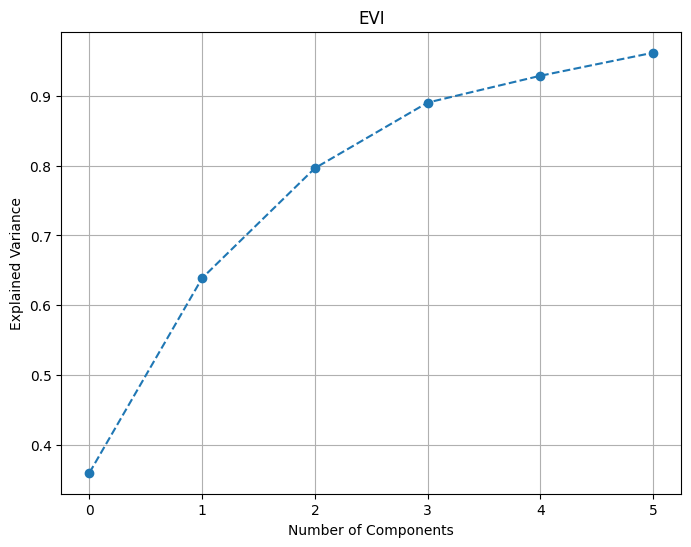

In [ ]:
pca = PCA(0.95)
pca.fit(scaled_data)



# Plot explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.plot(explained_variance_cumulative, marker='o', linestyle='--')
plt.title('EVI')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

In [ ]:

#Project the data onto selected principal components
X_reduced = pca.transform(scaled_data)[:, :n_components]

In [ ]:
X_reduced

array([[-2.76386498,  1.99740955,  1.30595227, -0.2765634 , -0.60129547,
        -0.31009264],
       [-2.94209814,  2.30060416,  1.89825052,  0.42898514, -0.02891227,
        -0.47997884],
       [-2.44882492,  1.89436774,  0.25587516, -1.23741825, -0.55453107,
        -0.47929196],
       ...,
       [-0.38947636, -1.99411625, -0.11975119,  0.18737068, -0.11770425,
         0.3445414 ],
       [-0.62151968, -2.069733  ,  0.04455216,  0.10699012, -0.32277515,
         0.37180406],
       [-0.58819917, -2.04649021, -0.00907738,  0.12441634, -0.23127621,
         0.33197221]])

In [ ]:
from sklearn.svm import SVR

In [ ]:
# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'SVM Regressor': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost Regressor': XGBRegressor(n_estimators=50, random_state=42)
}

# Initialize dictionaries to store evaluation metrics
rmse_scores = {}
mae_scores = {}
mape_scores = {}
r2_scores = {}

# Iterate through each model
for model_name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the validation data
    y_pred = model.predict(X_valid)

    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    mae = mean_absolute_error(y_valid, y_pred)
    r2 = r2_score(y_valid, y_pred)

    # Store metrics in dictionaries
    rmse_scores[model_name] = rmse
    mae_scores[model_name] = mae
    r2_scores[model_name] = r2

# Display the evaluation metrics for each model
print("Regression Metrics:")
for model_name in models.keys():
    print(f"Model: {model_name}")
    print(f"  RMSE: {rmse_scores[model_name]:.2f}")
    print(f"  MAE: {mae_scores[model_name]:.2f}")
    print(f"  R2: {r2_scores[model_name]:.2f}")
    print()


Regression Metrics:
Model: Linear Regression
  RMSE: 0.08
  MAE: 0.06
  R2: 0.64

Model: SVM Regressor
  RMSE: 0.07
  MAE: 0.05
  R2: 0.75

Model: Decision Tree Regressor
  RMSE: 0.09
  MAE: 0.06
  R2: 0.58

Model: Random Forest Regressor
  RMSE: 0.06
  MAE: 0.04
  R2: 0.78

Model: XGBoost Regressor
  RMSE: 0.06
  MAE: 0.05
  R2: 0.77



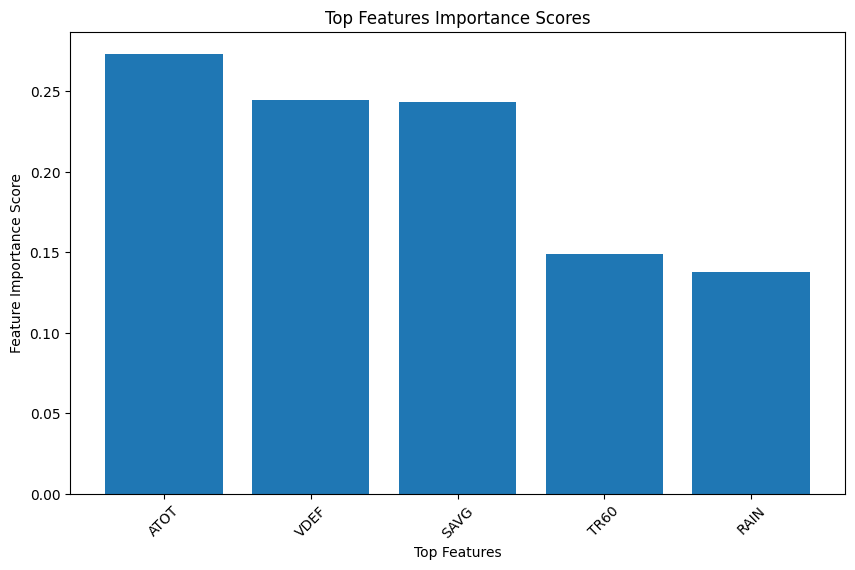

In [ ]:
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Extract Feature Importance
feature_importance = rf_model.feature_importances_

# Step 3: Map Feature Importance to Original Features (if you know how PCA components are constructed)
# Example: mapping importance scores back to the original features
original_feature_importance = pca.components_.T @ feature_importance

# Step 4: Select Top Features
top_features_indices = original_feature_importance.argsort()[-5:][::-1]
top_features = X.columns[top_features_indices]

import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already identified top_features
# Example: top_features = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5']

# Plotting the feature importance scores for the top features
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_features)), original_feature_importance[top_features_indices], align='center')
plt.xticks(range(len(top_features)), top_features, rotation=45)
plt.xlabel('Top Features')
plt.ylabel('Feature Importance Score')
plt.title('Top Features Importance Scores')
plt.show()


In [ ]:
# Step 2: Extract Feature Importance
feature_importance = rf_model.feature_importances_

# Step 3: Map Feature Importance to Original Features (if you know how PCA components are constructed)
# Example: mapping importance scores back to the original features
original_feature_importance = pca.components_.T @ feature_importance

# Step 4: Select Top Features
top_features_indices = original_feature_importance.argsort()[-5:][::-1]
top_features = X.columns[top_features_indices]


In [ ]:
top_features

Index(['ATOT', 'VDEF', 'SAVG', 'TR60', 'RAIN'], dtype='object')

In [ ]:
print("Top 5 Features:", top_features)


Top 5 Features: Index(['ATOT', 'VDEF', 'SAVG', 'TR60', 'RAIN'], dtype='object')


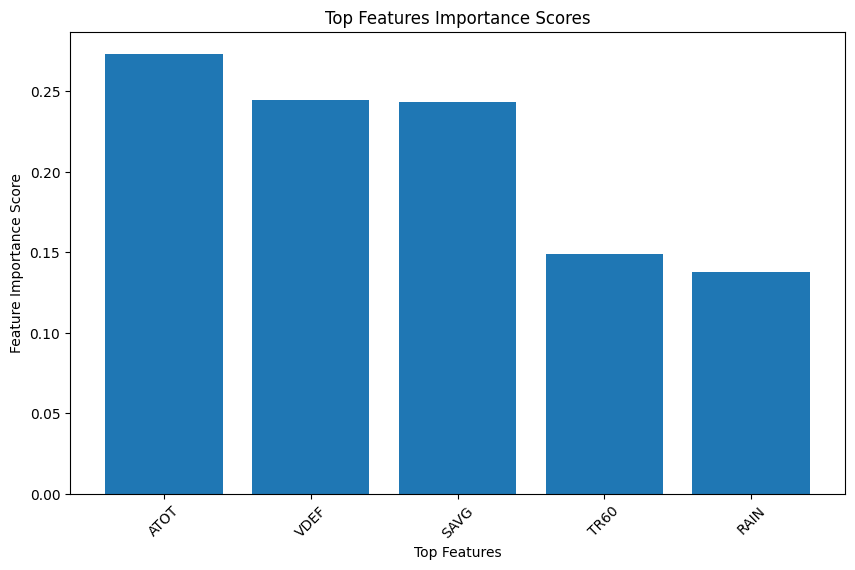

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already identified top_features
# Example: top_features = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5']

# Plotting the feature importance scores for the top features
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_features)), original_feature_importance[top_features_indices], align='center')
plt.xticks(range(len(top_features)), top_features, rotation=45)
plt.xlabel('Top Features')
plt.ylabel('Feature Importance Score')
plt.title('Top Features Importance Scores')
plt.show()

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.2 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
xgb_model = XGBRegressor(n_estimators=200, random_state=42)
xgb_model.fit(X_train, y_train)

# Extract top 5 features from original data using SHAP values
explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(X_valid)

# Sum of absolute SHAP values for each feature across all samples
feature_importance = abs(shap_values).mean(axis=0)
top_features_indices = feature_importance.argsort()[-5:][::-1]
top_features = X.columns[top_features_indices]

# Display or use the top 5 features
print("Top 5 Features:", top_features)

Top 5 Features: Index(['VDEF', 'ATOT', 'TR25', 'SAVG', 'TR60'], dtype='object')


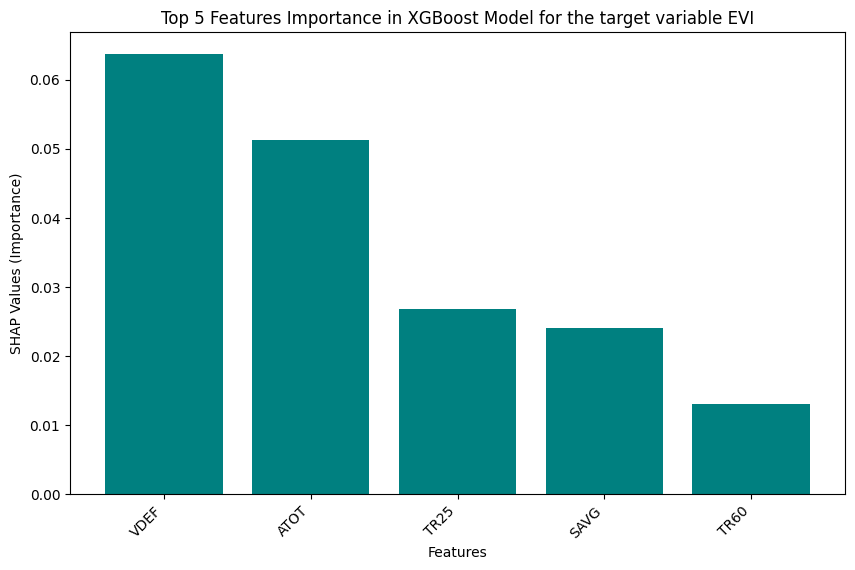

In [ ]:
# Plotting the top 5 features and their importances
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot
ax.bar(top_features, feature_importance[top_features_indices], color='teal')

# Adding labels and title
ax.set_xlabel('Features')
ax.set_ylabel('SHAP Values (Importance)')
ax.set_title('Top 5 Features Importance in XGBoost Model for the target variable EVI')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

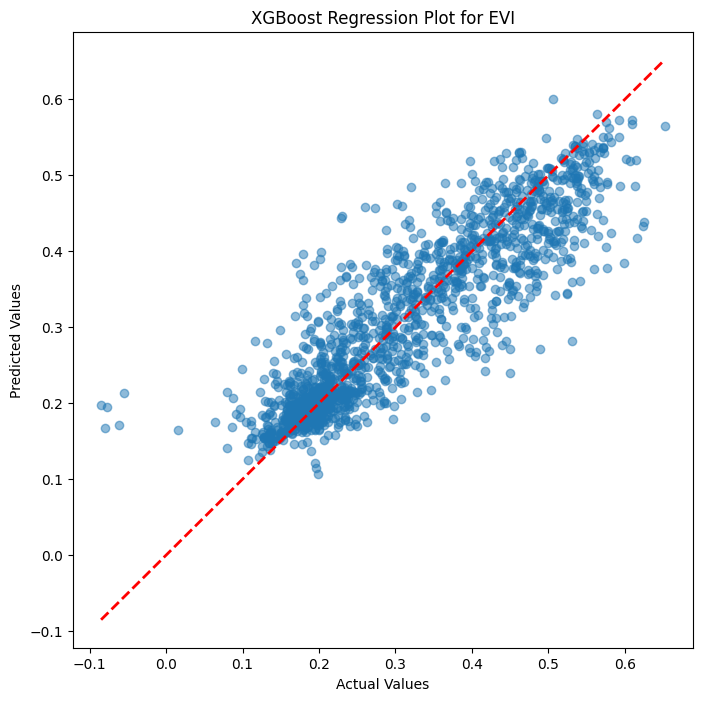

In [ ]:

rf_model = XGBRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_valid)

# Create a regression plot
plt.figure(figsize=(8, 8))
plt.scatter(y_valid, y_pred, alpha=0.5)
plt.title('XGBoost Regression Plot for EVI')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], linestyle='--', color='red', linewidth=2)  # Diagonal line for reference
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for the models you want to tune
param_grids = {
    'SVM Regressor': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': [0.01, 0.1, 1]
    },
    'Decision Tree Regressor': {
        'max_depth': [3,4,5,6],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest Regressor': {
        'n_estimators': [20, 50, 100],
        'max_depth': [3,4,5,6],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost Regressor': {
        'n_estimators': [20, 50, 100],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }
}

# Initialize dictionaries to store best models and their evaluation metrics
best_models = {}
best_rmse_scores = {}
best_mae_scores = {}
best_r2_scores = {}

# Iterate through each model
for model_name, model in models.items():
    # Check if the model supports hyperparameter tuning
    if model_name in param_grids:
        # Create a GridSearchCV instance for hyperparameter tuning
        grid_search = GridSearchCV(model, param_grids[model_name], scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

        # Fit the GridSearchCV on the training data
        grid_search.fit(X_train, y_train)

        # Get the best model with the tuned hyperparameters
        best_model = grid_search.best_estimator_

        # Predict on the validation data with the best model
        y_pred = best_model.predict(X_valid)

        # Calculate evaluation metrics
        rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
        mae = mean_absolute_error(y_valid, y_pred)
        r2 = r2_score(y_valid, y_pred)

        # Store the best model and its RMSE score
        best_models[model_name] = best_model
        best_rmse_scores[model_name] = rmse
        best_mae_scores[model_name] = mae
        best_r2_scores[model_name] = r2

# Display the best models and their evaluation metrics
print("Best Models after Hyperparameter Tuning:")
for model_name in best_models.keys():
    print(f"Model: {model_name}")
    print(f"Best Hyperparameters: {best_models[model_name].get_params()}")
    print(f"  RMSE: {best_rmse_scores[model_name]:.2f}")
    print(f"  MAE: {best_mae_scores[model_name]:.2f}")
    print(f"  R2: {best_r2_scores[model_name]:.2f}")
    print()
    print()


Best Models after Hyperparameter Tuning:
Model: SVM Regressor
Best Hyperparameters: {'C': 1, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
  RMSE: 0.07
  MAE: 0.05
  R2: 0.75


Model: Decision Tree Regressor
Best Hyperparameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
  RMSE: 0.08
  MAE: 0.06
  R2: 0.63


Model: Random Forest Regressor
Best Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 6, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_sc

In [ ]:
y1 = p13_LSWI['LSWI']
X1 = p13_LSWI.drop(['EVI', 'LSWI'], axis=1)

In [ ]:
X1

,TMAX,TMIN,TAVG,HAVG,VDEF,HDEG,CDEG,WSPD,ATOT,RAIN,SAVG,BAVG,TR05,TR25,TR60,RAIN_7_Days,RAIN_14_Days,RAIN_21_Days,RAIN_28_Days
Date,,,,,,,,,,,,,,,,,,,
2000-03-16,51.91,30.63,35.60,99.84,0.01,23.73,0.0,12.53,1.95,0.23,49.93,49.05,1.5728,1.5437,1.4708,0.54,1.31,2.60,3.08
2000-03-17,44.02,31.91,38.90,99.32,0.06,27.03,0.0,4.99,3.44,0.40,45.32,43.58,1.5291,1.5439,1.4723,0.93,1.64,2.42,3.48
2000-03-18,47.59,39.43,42.18,91.32,0.85,21.49,0.0,8.90,5.66,0.02,47.26,46.06,1.5287,1.5465,1.4685,0.95,1.66,2.44,3.50
2000-03-19,60.55,37.21,46.12,67.95,4.29,16.12,0.0,11.10,23.28,0.00,48.96,48.53,1.5285,1.5431,1.4681,0.95,1.66,2.44,3.50
2000-03-20,73.85,37.63,55.00,57.60,8.43,9.26,0.0,15.37,23.64,0.00,50.32,50.28,1.5416,1.5443,1.4706,0.95,1.66,2.44,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,62.96,35.38,48.06,75.90,3.46,15.83,0.0,11.00,9.35,0.01,48.02,47.67,2.3404,1.9822,2.5208,0.01,0.02,0.02,0.02
2021-12-24,78.84,50.56,65.62,38.61,14.70,0.30,0.0,18.00,7.44,0.00,49.79,51.71,2.3299,1.9822,2.5161,0.01,0.01,0.02,0.02
2021-12-25,71.31,45.97,58.67,48.67,9.56,6.36,0.0,7.34,9.60,0.00,51.51,55.04,2.3254,1.9832,2.5116,0.01,0.01,0.02,0.02


In [ ]:
# Create a linear regression model
model1 = LinearRegression()

# Create the RFE model with linear regression as the estimator and specify the number of features to select
num_features_to_select = 8  # no of selected features
rfe = RFE(estimator=model1, n_features_to_select=num_features_to_select)

# Fit the RFE model to your data
rfe.fit(X1, y1)  # X should be your feature matrix, and y your target variable

# Print the ranking of each feature
print("Feature Rankings:")
print(rfe.ranking_)

# Print the selected features and their importance scores
selected_features = np.array(X1.columns)[rfe.support_]
importance_scores = rfe.estimator_.coef_
print("Selected Features:")
for feature, score in zip(selected_features, importance_scores):
    print(f"{feature}: {score:.4f}")

Feature Rankings:
[ 1  4 12 11  5  3  2  8  7 10  1  1  1  1  1  1  9  6  1]
Selected Features:
TMAX: -0.0031
SAVG: 0.0066
BAVG: 0.0046
TR05: -0.0100
TR25: -0.0145
TR60: -0.0278
RAIN_7_Days: 0.0034
RAIN_28_Days: 0.0068


In [ ]:
X1 = X1[['TMAX','SAVG','BAVG','TR05','TR25','TR60','RAIN_7_Days','RAIN_28_Days']]

In [ ]:
X1

,TMAX,SAVG,BAVG,TR05,TR25,TR60,RAIN_7_Days,RAIN_28_Days
Date,,,,,,,,
2000-03-16,51.91,49.93,49.05,1.5728,1.5437,1.4708,0.54,3.08
2000-03-17,44.02,45.32,43.58,1.5291,1.5439,1.4723,0.93,3.48
2000-03-18,47.59,47.26,46.06,1.5287,1.5465,1.4685,0.95,3.50
2000-03-19,60.55,48.96,48.53,1.5285,1.5431,1.4681,0.95,3.50
2000-03-20,73.85,50.32,50.28,1.5416,1.5443,1.4706,0.95,3.50
...,...,...,...,...,...,...,...,...
2021-12-23,62.96,48.02,47.67,2.3404,1.9822,2.5208,0.01,0.02
2021-12-24,78.84,49.79,51.71,2.3299,1.9822,2.5161,0.01,0.02
2021-12-25,71.31,51.51,55.04,2.3254,1.9832,2.5116,0.01,0.02


In [ ]:
# Standardize the data
scaler1 = StandardScaler()
scaled_data1 = scaler1.fit_transform(X1)

In [ ]:
# Apply PCA
pca1 = PCA()
pca1.fit(scaled_data1)

# Calculate cumulative explained variance
explained_variance_ratio = pca1.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

In [ ]:
# Select principal components to explain 95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1

n_components

5

In [ ]:
loadings = pd.DataFrame(
    data=pca1.components_.T * np.sqrt(pca1.explained_variance_),
    columns=[f'PC{i}' for i in range(1, len(X1.columns) + 1)],
    index=X1.columns
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
TMAX,0.866123,0.307121,-0.236786,-0.076354,-0.135339,0.003101,-0.274201,0.015060
SAVG,0.885417,0.386243,-0.147070,-0.040675,-0.070612,0.002063,0.172881,0.093908
BAVG,0.893355,0.351949,-0.217944,-0.029391,-0.072636,-0.015074,0.113848,-0.106533
TR05,0.708446,-0.507866,-0.048611,0.323810,0.280607,-0.232270,-0.019238,0.005361
TR25,0.768765,-0.374225,0.365710,0.176464,0.096708,0.307811,-0.009194,-0.004099
TR60,0.532296,-0.390374,0.619219,-0.398136,-0.073390,-0.130547,0.003332,-0.003567
RAIN_7_Days,-0.077167,0.703913,0.560939,0.349245,-0.233741,-0.084673,-0.015628,-0.002587
RAIN_28_Days,-0.015304,0.836640,0.197548,-0.144945,0.488846,0.011265,-0.028136,-0.002134


In [ ]:
loadings = pd.DataFrame(
    data=pca1.components_.T * np.sqrt(pca1.explained_variance_),
    columns=[f'PC{i}' for i in range(1, pca1.components_.shape[0] + 1)],
    index=X1.columns
)
loadings

,PC1,PC2,PC3,PC4,PC5
TMAX,0.866123,0.307121,-0.236786,-0.076354,-0.135339
SAVG,0.885417,0.386243,-0.147070,-0.040675,-0.070612
BAVG,0.893355,0.351949,-0.217944,-0.029391,-0.072636
TR05,0.708446,-0.507866,-0.048611,0.323810,0.280607
TR25,0.768765,-0.374225,0.365710,0.176464,0.096708
TR60,0.532296,-0.390374,0.619219,-0.398136,-0.073390
RAIN_7_Days,-0.077167,0.703913,0.560939,0.349245,-0.233741
RAIN_28_Days,-0.015304,0.836640,0.197548,-0.144945,0.488846


In [ ]:
pca1.components_.shape[0]

5

In [ ]:
data=pca1.components_.T * np.sqrt(pca1.explained_variance_)
data.shape
print(data)

[[ 0.86612282  0.30712055 -0.23678595 -0.07635431 -0.13533881]
 [ 0.8854173   0.38624289 -0.14707018 -0.04067457 -0.07061172]
 [ 0.89335504  0.35194856 -0.21794367 -0.02939143 -0.0726364 ]
 [ 0.70844615 -0.50786618 -0.04861082  0.32380973  0.28060716]
 [ 0.76876473 -0.37422524  0.36570981  0.17646439  0.09670784]
 [ 0.5322965  -0.39037438  0.61921896 -0.39813556 -0.07339018]
 [-0.07716728  0.70391308  0.5609386   0.34924543 -0.23374138]
 [-0.01530444  0.83663965  0.19754844 -0.1449446   0.48884637]]


In [ ]:
columns=[f'PC{i}' for i in range(1, len(X1.columns) + 1)]
len(columns)

8

In [ ]:
X1.columns.shape

(8,)

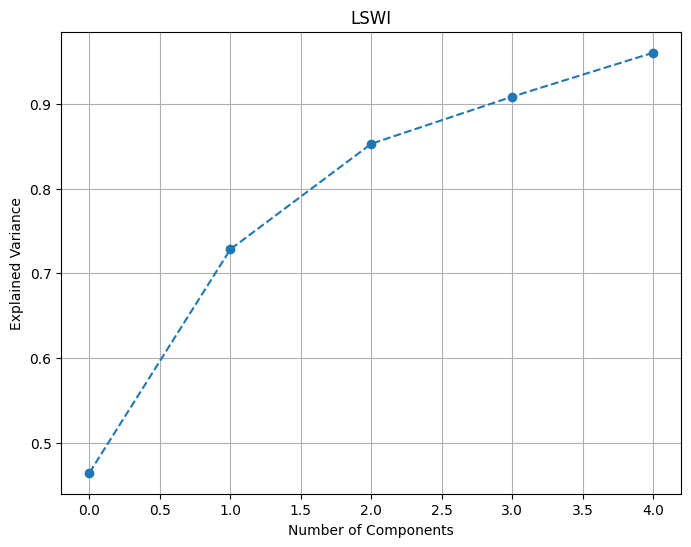

In [ ]:
pca1 = PCA(0.95)
pca1.fit(scaled_data1)



# Plot explained variance ratio
explained_variance = pca1.explained_variance_ratio_
explained_variance_cumulative = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.plot(explained_variance_cumulative, marker='o', linestyle='--')
plt.title('LSWI')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

In [ ]:
#Project the data onto selected principal components
X1_reduced = pca1.transform(scaled_data1)[:, :n_components]

In [ ]:
X1_reduced

array([[-2.05971046,  1.1788557 ,  0.22791054,  0.039148  ,  1.09500465],
       [-2.61655516,  1.55261374,  0.98428954,  0.43202227,  1.22474016],
       [-2.39754617,  1.69855261,  0.91099663,  0.41561174,  1.15211328],
       ...,
       [-0.33749468, -1.53948889, -0.42219518, -0.04943227, -0.54643865],
       [-0.27170016, -1.51917818, -0.46215886, -0.06046444, -0.57949602],
       [-0.70628324, -1.73362027, -0.23395594,  0.06112331, -0.37041176]])

In [ ]:
from sklearn.svm import SVR

In [ ]:
# Split the data into training and validation sets (80% train, 20% validation)
X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1_reduced, y1, test_size=0.2, random_state=42)


# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'SVM Regressor': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost Regressor': XGBRegressor(n_estimators=100, random_state=42)
}

# Initialize dictionaries to store evaluation metrics
rmse_scores = {}
mae_scores = {}
mape_scores = {}
r2_scores = {}

# Iterate through each model
for model_name, model in models.items():
    # Fit the model on the training data
    model.fit(X1_train, y1_train)

    # Predict on the validation data
    y1_pred = model.predict(X1_valid)

    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y1_valid, y1_pred))
    mae = mean_absolute_error(y1_valid, y1_pred)
    r2 = r2_score(y1_valid, y1_pred)

    # Store metrics in dictionaries
    rmse_scores[model_name] = rmse
    mae_scores[model_name] = mae
    r2_scores[model_name] = r2

# Display the evaluation metrics for each model
print("Regression Metrics:")
for model_name in models.keys():
    print(f"Model: {model_name}")
    print(f"  RMSE: {rmse_scores[model_name]:.2f}")
    print(f"  MAE: {mae_scores[model_name]:.2f}")
    print(f"  R2: {r2_scores[model_name]:.2f}")
    print()


Regression Metrics:
Model: Linear Regression
  RMSE: 0.11
  MAE: 0.08
  R2: 0.48

Model: SVM Regressor
  RMSE: 0.09
  MAE: 0.07
  R2: 0.66

Model: Decision Tree Regressor
  RMSE: 0.11
  MAE: 0.07
  R2: 0.47

Model: Random Forest Regressor
  RMSE: 0.08
  MAE: 0.06
  R2: 0.71

Model: XGBoost Regressor
  RMSE: 0.09
  MAE: 0.06
  R2: 0.66



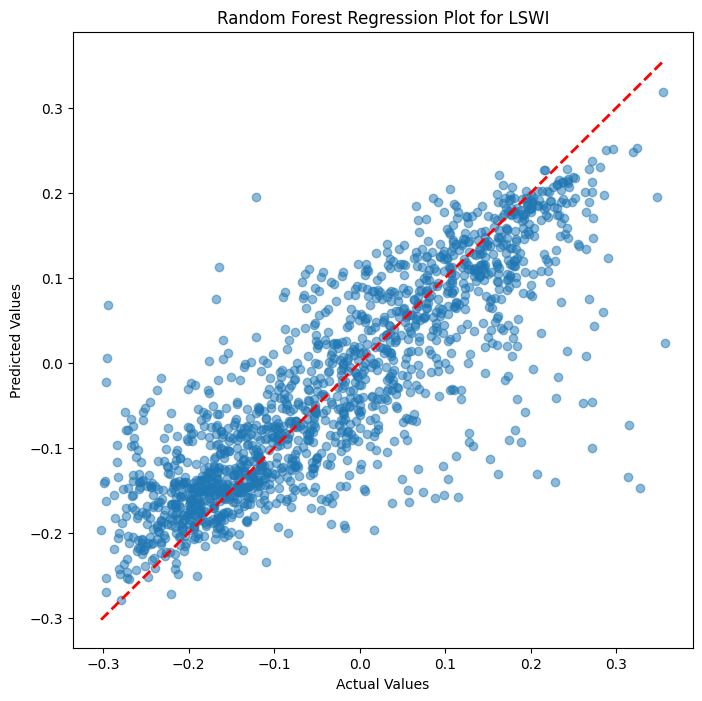

In [ ]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X1_train, y1_train)

# Make predictions on the test set
y1_pred = rf_model.predict(X1_valid)

# Create a regression plot
plt.figure(figsize=(8, 8))
plt.scatter(y1_valid, y1_pred, alpha=0.5)
plt.title('Random Forest Regression Plot for LSWI')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y1_valid), max(y1_valid)], [min(y1_valid), max(y1_valid)], linestyle='--', color='red', linewidth=2)  # Diagonal line for reference
plt.show()

In [ ]:
X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1_reduced, y1, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for the models you want to tune
param_grids = {
    'SVM Regressor': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': [0.01, 0.1, 1]
    },
    'Decision Tree Regressor': {
        'max_depth': [3,4,5,6],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest Regressor': {
        'n_estimators': [20, 50, 100],
        'max_depth': [3,4,5,6],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost Regressor': {
        'n_estimators': [20, 50, 100],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }
}

# Initialize dictionaries to store best models and their evaluation metrics
best_models = {}
best_rmse_scores = {}
best_mae_scores = {}
best_r2_scores = {}

# Iterate through each model
for model_name, model in models.items():
    # Check if the model supports hyperparameter tuning
    if model_name in param_grids:
        # Create a GridSearchCV instance for hyperparameter tuning
        grid_search = GridSearchCV(model, param_grids[model_name], scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

        # Fit the GridSearchCV on the training data
        grid_search.fit(X1_train, y1_train)

        # Get the best model with the tuned hyperparameters
        best_model = grid_search.best_estimator_

        # Predict on the validation data with the best model
        y1_pred = best_model.predict(X1_valid)

        # Calculate evaluation metrics
        rmse = np.sqrt(mean_squared_error(y1_valid, y1_pred))
        mae = mean_absolute_error(y1_valid, y1_pred)
        r2 = r2_score(y1_valid, y1_pred)

        # Store the best model and its RMSE score
        best_models[model_name] = best_model
        best_rmse_scores[model_name] = rmse
        best_mae_scores[model_name] = mae
        best_r2_scores[model_name] = r2

# Display the best models and their evaluation metrics
print("Best Models after Hyperparameter Tuning:")
for model_name in best_models.keys():
    print(f"Model: {model_name}")
    print(f"Best Hyperparameters: {best_models[model_name].get_params()}")
    print(f"  RMSE: {best_rmse_scores[model_name]:.2f}")
    print(f"  MAE: {best_mae_scores[model_name]:.2f}")
    print(f"  R2: {best_r2_scores[model_name]:.2f}")
    print()

Best Models after Hyperparameter Tuning:
Model: SVM Regressor
Best Hyperparameters: {'C': 1, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
  RMSE: 0.09
  MAE: 0.07
  R2: 0.66

Model: Decision Tree Regressor
Best Hyperparameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
  RMSE: 0.10
  MAE: 0.07
  R2: 0.57

Model: Random Forest Regressor
Best Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 6, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score

## **PCA + Modelling**

In [ ]:
y2 = p13_EVI['EVI']
X2 = p13_EVI.drop(['EVI', 'LSWI'], axis=1)

NameError: ignored

In [ ]:
X2

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardize the data
scaler2 = StandardScaler()
scaled_data2 = scaler2.fit_transform(X2)

In [ ]:
# Apply PCA
pca2 = PCA()
pca2.fit(scaled_data2)

# Calculate cumulative explained variance
explained_variance_ratio = pca2.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

In [ ]:
# Select principal components to explain 95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1

n_components

10

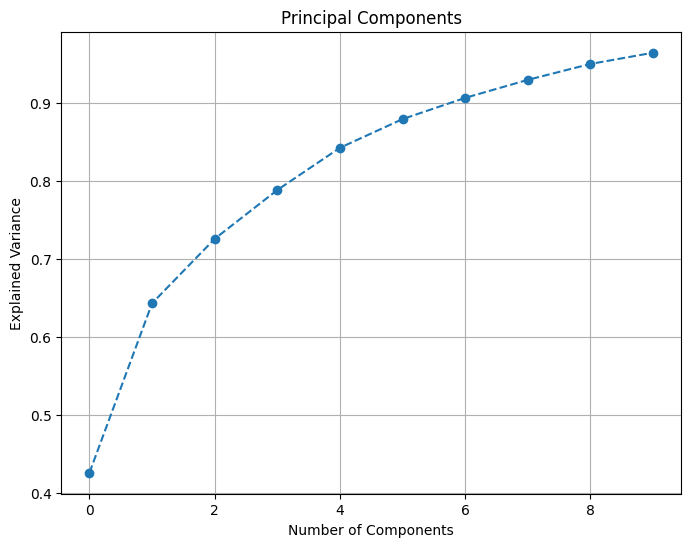

In [ ]:
pca2 = PCA(0.95)
pca2.fit(scaled_data2)



# Plot explained variance ratio
explained_variance = pca2.explained_variance_ratio_
explained_variance_cumulative = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.plot(explained_variance_cumulative, marker='o', linestyle='--')
plt.title('Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

In [ ]:
loadings = pd.DataFrame(
    data=pca2.components_.T * np.sqrt(pca2.explained_variance_),
    columns=[f'PC{i}' for i in range(1, pca2.components_.shape[0] + 1)],
    index=X2.columns
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
TMAX,0.961206,0.038039,-0.098935,-0.077542,-0.023945,0.021866,-0.117046,-0.090337,-0.030535,-0.057117
TMIN,0.921902,0.193400,0.052162,-0.266379,0.020655,-0.097954,-0.007878,0.023771,0.027055,-0.065430
TAVG,0.970660,0.111499,-0.036206,-0.167945,-0.000663,-0.032019,-0.061899,-0.036006,-0.007902,-0.052738
HAVG,-0.277028,0.526150,0.438124,-0.515162,-0.215168,-0.236253,0.083100,0.150085,-0.020114,0.185346
VDEF,0.855258,-0.269889,-0.214622,0.221573,0.078265,0.126559,0.026649,0.036905,0.130948,-0.121277
HDEG,-0.880298,-0.187984,0.051161,0.227418,0.006909,0.050428,0.194558,0.206146,0.205818,0.065419
CDEG,0.855303,-0.042267,0.028719,-0.033015,0.004511,-0.005146,0.191081,0.288626,0.366303,-0.029319
WSPD,0.010463,-0.124077,-0.276509,-0.224860,0.881436,-0.260405,0.039035,0.040470,-0.027139,0.089561
ATOT,0.720965,-0.024693,-0.433140,0.242864,-0.087562,0.198692,-0.089893,0.053310,-0.038411,0.409918
RAIN,-0.018514,0.424282,0.501941,-0.218239,0.334007,0.589690,0.053119,-0.199714,0.119034,0.057358


In [ ]:
#Project the data onto selected principal components
X2_reduced = pca2.transform(scaled_data2)[:, :n_components]

In [ ]:
X2_reduced.shape

(7795, 10)

In [ ]:
# Split the data into training and validation sets (80% train, 20% validation)
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2_reduced, y2, test_size=0.05, random_state=42)


# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'SVM Regressor': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost Regressor': XGBRegressor(n_estimators=50, random_state=42)
}

# Initialize dictionaries to store evaluation metrics
rmse_scores = {}
mae_scores = {}
mape_scores = {}
r2_scores = {}

# Iterate through each model
for model_name, model in models.items():
    # Fit the model on the training data
    model.fit(X2_train, y2_train)

    # Predict on the validation data
    y2_pred = model.predict(X2_valid)

    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y2_valid, y2_pred))
    mae = mean_absolute_error(y2_valid, y2_pred)
    r2 = r2_score(y2_valid, y2_pred)

    # Store metrics in dictionaries
    rmse_scores[model_name] = rmse
    mae_scores[model_name] = mae
    r2_scores[model_name] = r2

# Display the evaluation metrics for each model
print("Regression Metrics:")
for model_name in models.keys():
    print(f"Model: {model_name}")
    print(f"  RMSE: {rmse_scores[model_name]:.2f}")
    print(f"  MAE: {mae_scores[model_name]:.2f}")
    print(f"  R2: {r2_scores[model_name]:.2f}")
    print()


NameError: ignored

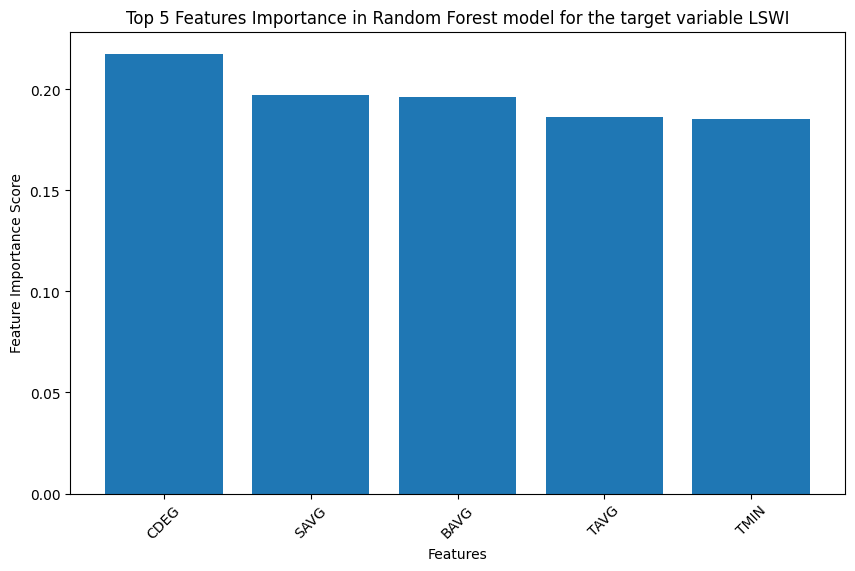

In [ ]:
rf_model3 = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model3.fit(X2_train, y2_train)

# Step 2: Extract Feature Importance
feature_importance = rf_model3.feature_importances_

# Step 3: Map Feature Importance to Original Features (if you know how PCA components are constructed)
# Example: mapping importance scores back to the original features
original_feature_importance = pca2.components_.T @ feature_importance

# Step 4: Select Top Features
top_features_indices = original_feature_importance.argsort()[-5:][::-1]
top_features = X2.columns[top_features_indices]

import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already identified top_features
# Example: top_features = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5']

# Plotting the feature importance scores for the top features
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_features)), original_feature_importance[top_features_indices], align='center')
plt.xticks(range(len(top_features)), top_features, rotation=45)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Top 5 Features Importance in Random Forest model for the target variable LSWI')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for the models you want to tune
param_grids = {
    'SVM Regressor': {
        'C': [0.1, 1, 10,100],
        'kernel': ['linear', 'rbf'],
        'gamma': [0.01, 0.1, 1]
    },
    'Linear Regression': {
        'fit_intercept': [True, False]

    },
    'Random Forest Regressor': {
        'n_estimators': [20, 50, 100],
        'max_depth': [3,4,5,6,7],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost Regressor': {
        'n_estimators': [20, 50, 100],
        'max_depth': [3, 5,6, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }
}

# Initialize dictionaries to store best models and their evaluation metrics
best_models = {}
best_rmse_scores = {}
best_mae_scores = {}
best_r2_scores = {}

# Iterate through each model
for model_name, model in models.items():
    # Check if the model supports hyperparameter tuning
    if model_name in param_grids:
        # Create a GridSearchCV instance for hyperparameter tuning
        grid_search = GridSearchCV(model, param_grids[model_name], scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

        # Fit the GridSearchCV on the training data
        grid_search.fit(X2_train, y2_train)

        # Get the best model with the tuned hyperparameters
        best_model = grid_search.best_estimator_

        # Predict on the validation data with the best model
        y2_pred = best_model.predict(X2_valid)

        # Calculate evaluation metrics
        rmse = np.sqrt(mean_squared_error(y2_valid, y2_pred))
        mae = mean_absolute_error(y2_valid, y2_pred)
        r2 = r2_score(y2_valid, y2_pred)

        # Store the best model and its RMSE score
        best_models[model_name] = best_model
        best_rmse_scores[model_name] = rmse
        best_mae_scores[model_name] = mae
        best_r2_scores[model_name] = r2

# Display the best models and their evaluation metrics
print("Best Models after Hyperparameter Tuning:")
for model_name in best_models.keys():
    print(f"Model: {model_name}")
    print(f"Best Hyperparameters: {best_models[model_name].get_params()}")
    print(f"  RMSE: {best_rmse_scores[model_name]:.2f}")
    print(f"  MAE: {best_mae_scores[model_name]:.2f}")
    print(f"  R2: {best_r2_scores[model_name]:.2f}")
    print()

KeyboardInterrupt: ignored

In [ ]:
y3 = p13_LSWI['LSWI']
X3 = p13_LSWI.drop(['EVI', 'LSWI'], axis=1)

In [ ]:
# Standardize the data
scaler3 = StandardScaler()
scaled_data3 = scaler3.fit_transform(X3)

In [ ]:
# Apply PCA
pca3 = PCA()
pca3.fit(scaled_data3)

# Calculate cumulative explained variance
explained_variance_ratio = pca3.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

In [ ]:
# Select principal components to explain 95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1

n_components

10

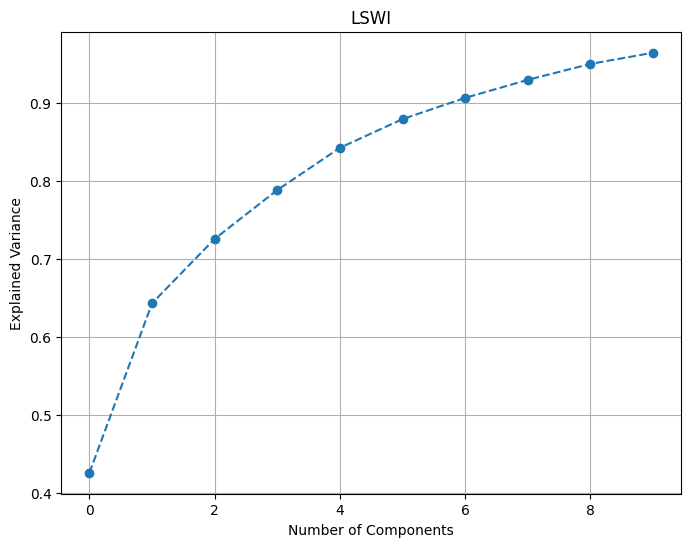

In [ ]:
pca3 = PCA(0.95)
pca3.fit(scaled_data3)



# Plot explained variance ratio
explained_variance = pca3.explained_variance_ratio_
explained_variance_cumulative = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.plot(explained_variance_cumulative, marker='o', linestyle='--')
plt.title('LSWI')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

In [ ]:
#Project the data onto selected principal components
X3_reduced = pca3.transform(scaled_data3)[:, :n_components]

In [ ]:
# Split the data into training and validation sets (80% train, 20% validation)
X3_train, X3_valid, y3_train, y3_valid = train_test_split(X3_reduced, y3, test_size=0.20, random_state=42)


# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'SVM Regressor': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost Regressor': XGBRegressor(n_estimators=100, random_state=42)
}

# Initialize dictionaries to store evaluation metrics
rmse_scores = {}
mae_scores = {}
mape_scores = {}
r2_scores = {}

# Iterate through each model
for model_name, model in models.items():
    # Fit the model on the training data
    model.fit(X3_train, y3_train)

    # Predict on the validation data
    y3_pred = model.predict(X3_valid)

    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y3_valid, y3_pred))
    mae = mean_absolute_error(y3_valid, y3_pred)
    r2 = r2_score(y3_valid, y3_pred)

    # Store metrics in dictionaries
    rmse_scores[model_name] = rmse
    mae_scores[model_name] = mae
    r2_scores[model_name] = r2

# Display the evaluation metrics for each model
print("Regression Metrics:")
for model_name in models.keys():
    print(f"Model: {model_name}")
    print(f"  RMSE: {rmse_scores[model_name]:.2f}")
    print(f"  MAE: {mae_scores[model_name]:.2f}")
    print(f"  R2: {r2_scores[model_name]:.2f}")
    print()


Regression Metrics:
Model: Linear Regression
  RMSE: 0.10
  MAE: 0.08
  R2: 0.56

Model: SVM Regressor
  RMSE: 0.09
  MAE: 0.07
  R2: 0.65

Model: Decision Tree Regressor
  RMSE: 0.12
  MAE: 0.09
  R2: 0.33

Model: Random Forest Regressor
  RMSE: 0.09
  MAE: 0.06
  R2: 0.66

Model: XGBoost Regressor
  RMSE: 0.09
  MAE: 0.07
  R2: 0.61



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for the models you want to tune
param_grids = {
    'SVM Regressor': {
        'C': [0.1, 1, 10,100],
        'kernel': ['linear', 'rbf'],
        'gamma': [0.01, 0.1, 1]
    },
    'Linear Regression': {
        'fit_intercept': [True, False]

    },
    'Random Forest Regressor': {
        'n_estimators': [20,50,100,200],
        'max_depth': [3,4,5,6,7],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost Regressor': {
        'n_estimators': [50,100,200,300],
        'max_depth': [3, 5,6, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }
}

# Initialize dictionaries to store best models and their evaluation metrics
best_models = {}
best_rmse_scores = {}
best_mae_scores = {}
best_r2_scores = {}

# Iterate through each model
for model_name, model in models.items():
    # Check if the model supports hyperparameter tuning
    if model_name in param_grids:
        # Create a GridSearchCV instance for hyperparameter tuning
        grid_search = GridSearchCV(model, param_grids[model_name], scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

        # Fit the GridSearchCV on the training data
        grid_search.fit(X3_train, y3_train)

        # Get the best model with the tuned hyperparameters
        best_model = grid_search.best_estimator_

        # Predict on the validation data with the best model
        y3_pred = best_model.predict(X3_valid)

        # Calculate evaluation metrics
        rmse = np.sqrt(mean_squared_error(y3_valid, y3_pred))
        mae = mean_absolute_error(y3_valid, y3_pred)
        r2 = r2_score(y3_valid, y3_pred)

        # Store the best model and its RMSE score
        best_models[model_name] = best_model
        best_rmse_scores[model_name] = rmse
        best_mae_scores[model_name] = mae
        best_r2_scores[model_name] = r2

# Display the best models and their evaluation metrics
print("Best Models after Hyperparameter Tuning:")
for model_name in best_models.keys():
    print(f"Model: {model_name}")
    print(f"Best Hyperparameters: {best_models[model_name].get_params()}")
    print(f"  RMSE: {best_rmse_scores[model_name]:.2f}")
    print(f"  MAE: {best_mae_scores[model_name]:.2f}")
    print(f"  R2: {best_r2_scores[model_name]:.2f}")
    print()

KeyboardInterrupt: ignored